# Setup

In [2]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


# Swedish

Es una lista de palabras que contiene un lexicon de palabras ordenado siempre de la misma manera, permite crear objetos que contienen pares en distintos idiomas para traducir oraciones.

In [3]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [4]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [5]:
translate = dict(fr2es)
translate['chien']

'perro'

In [6]:
translate['jeter']

'tirar'

# WordNet

Es un sysnet, un conjunto de palabras jerarquerizadas por la especificidad de sus definiciones.

In [7]:
import nltk
from nltk.corpus import wordnet as wn

In [8]:
nltk.download('omw-1.4')
ss = wn.synsets('carro', lang='spa')

[nltk_data] Downloading package omw-1.4 to /home/rml/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [10]:
for sys in ss:
    print("{:<25}: {:>}".format(sys.name(), sys.definition()))
    for name in sys.lemma_names():
        print('\t* {}'.format(name))

car.n.01                 : a motor vehicle with four wheels; usually propelled by an internal combustion engine
	* car
	* auto
	* automobile
	* machine
	* motorcar
carriage.n.04            : a machine part that carries something else
	* carriage
carrier.n.02             : a self-propelled wheeled vehicle designed specifically to carry something
	* carrier
cart.n.01                : a heavy open wagon usually having two wheels and drawn by an animal
	* cart
chariot.n.02             : a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
	* chariot
cartload.n.01            : the quantity that a cart holds
	* cartload


Hipónimos
: `.hyponims()`

Hiperónimos
: `.hypernyms()`

# Gráficas

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)
  nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])

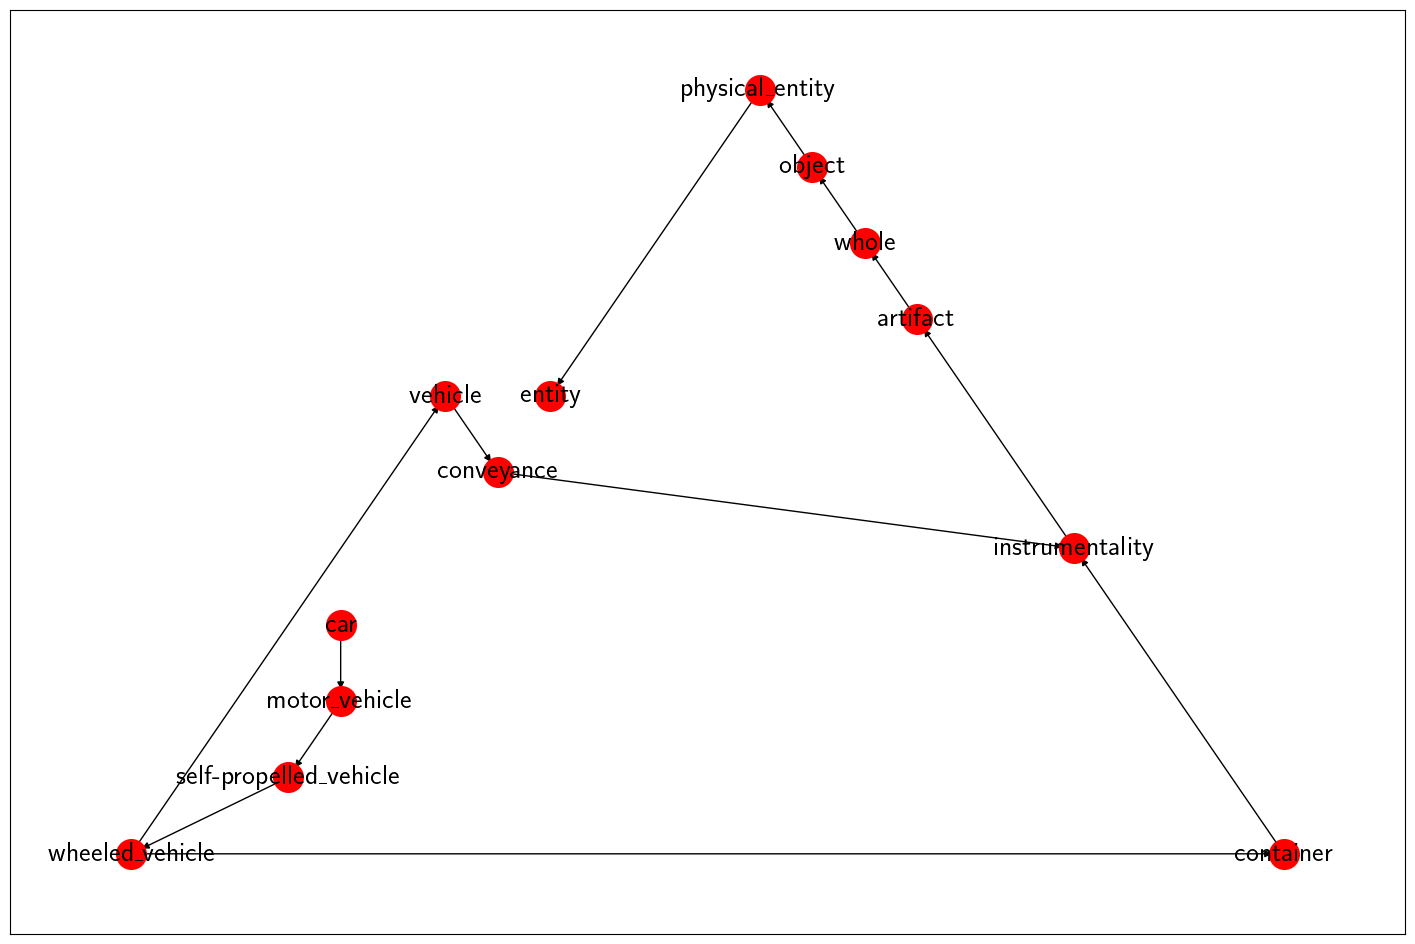

In [13]:
G, labels = clousure_graph(ss[0], fn = lambda x: x.hypernyms())
draw_text_graph(G, labels)

## Similitud semántica

In [14]:
ss1 = wn.synsets('perro', lang='spa')
ss2 = wn.synsets('gato', lang='spa')
ss3 = wn.synsets('animal', lang='spa')

In [15]:
perro = ss1[0]
gato = ss2[0]
animal = ss3[0]

In [16]:
animal.path_similarity(perro)

0.3333333333333333

In [17]:
animal.path_similarity(gato)

0.125

In [18]:
perro.path_similarity(gato)

0.2